# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processed record {index_counter} of set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Bypassing......")


Processed record 1 of set 1 : albany
Processed record 2 of set 1 : mataura
Processed record 3 of set 1 : ushuaia
Processed record 4 of set 1 : hithadhoo
Processed record 5 of set 1 : bengkulu
Processed record 6 of set 1 : faya
City not found. Bypassing......
Processed record 7 of set 1 : vila franca do campo
Processed record 8 of set 1 : vaini
Processed record 9 of set 1 : jamestown
Processed record 10 of set 1 : new norfolk
Processed record 11 of set 1 : college
Processed record 12 of set 1 : rikitea
Processed record 13 of set 1 : dikson
Processed record 14 of set 1 : kapaa
Processed record 15 of set 1 : carnarvon
City not found. Bypassing......
Processed record 16 of set 1 : mabaruma
Processed record 17 of set 1 : samarai
Processed record 18 of set 1 : englewood
Processed record 19 of set 1 : hobart
Processed record 20 of set 1 : east london
City not found. Bypassing......
City not found. Bypassing......
City not found. Bypassing......
City not found. Bypassing......
City not found. 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [7]:

weather_dict.count()

weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint Paul Harbor,90,US,1634598561,76,57.7900,-152.4072,45.91,14.97
1,Rikitea,18,PF,1634598701,71,-23.1203,-134.9692,75.52,20.13
2,Deputatsky,39,RU,1634598701,99,69.3000,139.9000,-15.56,4.34
3,Burdur,20,TR,1634598702,81,37.7203,30.2908,45.30,1.14
4,Mount Isa,13,AU,1634598702,29,-20.7333,139.5000,87.57,4.61
...,...,...,...,...,...,...,...,...,...
581,Yemel'yanovo,0,RU,1634598884,93,56.1681,92.6767,27.41,0.00
582,Balyqshy,40,KZ,1634598885,87,47.0667,51.8667,53.60,4.47
583,Mitzic,100,GA,1634598885,98,0.7821,11.5490,69.33,4.45
584,Santa Isabel Rio Negro,66,BR,1634598885,92,-0.4139,-65.0192,75.31,2.21


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

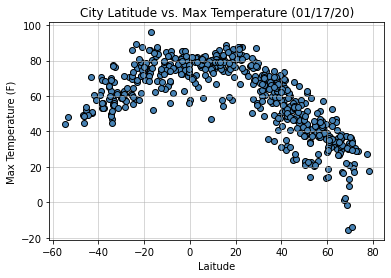

In [10]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")


plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

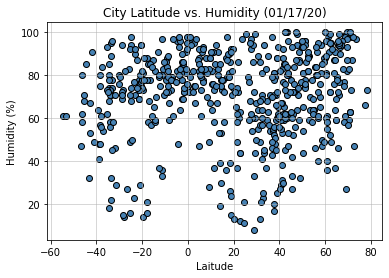

In [11]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (01/17/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

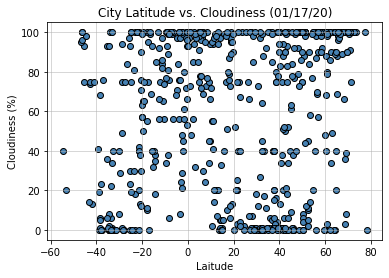

In [12]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Cloudiness (%)")

plt.ylim(-5,105)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

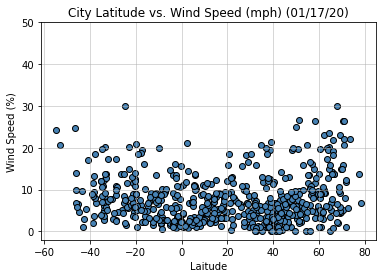

In [13]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

plt.xlabel("Laitude")

plt.ylabel("Wind Speed (%)")

plt.ylim(-2,50)

plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [14]:
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

annotate(equation, 0, 0)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")


NameError: name 'st' is not defined

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

annotate(equation, -30, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Max Temp (F)")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

annotate(equation, 40, 15)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Humidity (%)")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

annotate(equation, 30, 40)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

annotate(equation, -30, 40)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness (%)")



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

annotate(equation, 40, 20)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


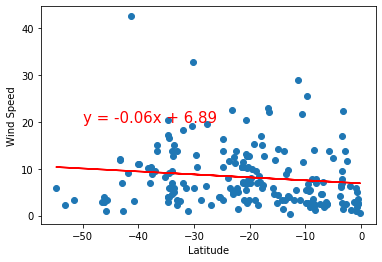

In [32]:
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

annotate(equation, -30, 15)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed (mph)")

In [ ]:
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")